# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Fauzan Abdurrohim]
- **Email:** [fauzan.abdurrohim1@gmail.com]
- **ID Dicoding:** [MUHAMMAD FAUZAN ABDURROHIM]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda bulanan selama periode 2021-01 sampai 2012-12? Apakah ada peningkatan atau penurunan yang signifikan?
- apakah ada pengaruh cuaca terhadap jumlah perental sepeda?

## Import Semua Packages/Library yang Digunakan

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
day_df = pd.read_csv("https://raw.githubusercontent.com/fauzanAbdu/proyek-analis-data/refs/heads/main/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/fauzanAbdu/proyek-analis-data/refs/heads/main/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [53]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [54]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [55]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [59]:
#merubah type data dteday dari object menjadi datetime di file day.csv
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])
#menghasilkan output setelah type data diubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [60]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [61]:
#exploratory data analysis day.csv
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [62]:
day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean", "std" ],  
    "weathersit": "nunique",  # Menghitung jumlah kondisi cuaca unik berdasarkan bulan
    "season": "nunique"  # Menghitung jumlah musim unik berdasarkan bulan
})

cnt                                       weathersit  season
         sum   max   min         mean          std    nunique nunique
mnth                                                                 
1     134933  4521   431  2176.338710  1161.674370          3       1
2     151352  5062  1005  2655.298246  1145.313307          3       1
3     228920  8362   605  3692.258065  1899.301812          3       2
4     269094  7460   795  4484.900000  1776.160778          3       1
5     331686  8294  2633  5349.774194  1298.711561          2       1
6     346342  8120  3767  5772.366667  1240.400031          2       2
7     344948  8173  3285  5563.677419  1273.751871          3       1
8     351194  7865  1115  5664.419355  1494.516146          2       1
9     345991  8714  1842  5766.516667  1810.130649          3       2
10    322352  8156    22  5199.225806  1988.392517          3       1
11    254831  6852  1495  4247.183333  1285.712709          3       1
12    211036  6606   441  3403.806452  1549.639353          3       2

In [63]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [64]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [65]:
#exploratory data analysis hour.csv
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [66]:
hour_df.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean", "std" ],  
    "weathersit": "nunique",  # Menghitung jumlah kondisi cuaca unik berdasarkan bulan
    "season": "nunique"  # Menghitung jumlah musim unik berdasarkan bulan
})

cnt                                  weathersit  season
         sum  max min        mean         std    nunique nunique
mnth                                                            
1     134933  559   1   94.424773   99.907146          4       1
2     151352  610   1  112.865026  112.486565          3       1
3     228920  957   1  155.410726  163.543050          3       2
4     269094  822   1  187.260960  181.137902          3       1
5     331686  873   1  222.907258  187.721497          3       1
6     346342  900   1  240.515278  196.038950          3       2
7     344948  913   1  231.819892  187.483806          3       1
8     351194  941   1  238.097627  200.444648          3       1
9     345991  977   1  240.773138  214.609531          3       2
10    322352  963   1  222.158511  203.477057          3       1
11    254831  729   1  177.335421  158.973887          3       1
12    211036  759   1  142.303439  141.080674          3       2

In [67]:
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [68]:
hour_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

In [69]:
#penggabungan file hour dan day
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
hour_day_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [70]:
hour_day_df.groupby(by="season_x").size().sort_values(ascending=False)

season_x
3    4496
2    4409
1    4242
4    4232
dtype: int64

In [71]:
hour_day_df.groupby(by="mnth_x").size().sort_values(ascending=False)

mnth_x
7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
dtype: int64

In [72]:
hour_day_df.groupby(by="weathersit_x").size().sort_values(ascending=False)

weathersit_x
1    11413
2     4544
3     1419
4        3
dtype: int64

In [73]:
hour_day_df.groupby(by=["season_x", "mnth_x"]).agg({
    "casual_x": "sum",         # Total pengguna casual
    "registered_x": "sum",     # Total pengguna terdaftar
    "cnt_x": "sum"             # Total jumlah pengguna sepeda
})

casual_x  registered_x   cnt_x
season_x mnth_x                                
1        1          12042        122891  134933
         2          14963        136389  151352
         3          27154        114911  142065
         12          6463         36535   42998
2        3          17290         69565   86855
         4          60802        208292  269094
         5          75285        256401  331686
         6          50145        180809  230954
3        6          23761         91627  115388
         7          78157        266791  344948
         8          72039        279155  351194
         9          52134        197465  249599
4        9          18189         78203   96392
         10         59760        262592  322352
         11         36603        218228  254831
         12         15230        152808  168038

In [74]:
hour_day_df.groupby(by=["mnth_x", "weathersit_x"]).agg({
    "casual_x": "sum",         # Total pengguna casual
    "registered_x": "sum",     # Total pengguna terdaftar
    "cnt_x": "sum"             # Total jumlah pengguna sepeda
})

casual_x  registered_x   cnt_x
mnth_x weathersit_x                                
1      1                 8843         83883   92726
       2                 2844         33790   36634
       3                  347          5003    5350
       4                    8           215     223
2      1                11196         94422  105618
       2                 3198         32216   35414
       3                  569          9751   10320
3      1                30077        126017  156094
       2                12978         49924   62902
       3                 1389          8535    9924
4      1                47314        154249  201563
       2                11997         43304   55301
       3                 1491         10739   12230
5      1                54799        178202  233001
       2                17029         61885   78914
       3                 3457         16314   19771
6      1                60005        214185  274190
       2                12213         49244   61457
       3                 1688          9007   10695
7      1                63869        211824  275693
       2                11669         45477   57146
       3                 2619          9490   12109
8      1                54514        203837  258351
       2                13508         61754   75262
       3                 4017         13564   17581
9      1                48183        190859  239042
       2                18819         68294   87113
       3                 3321         16515   19836
10     1                42720        161747  204467
       2                14392         80938   95330
       3                 2648         19907   22555
11     1                28455        148116  176571
       2                 7609         61219   68828
       3                  539          8893    9432
12     1                12770        108087  120857
       2                 8225         73426   81651
       3                  698          7830    8528

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda bulanan selama periode 2021-01 sampai 2012-12? Apakah ada peningkatan atau penurunan yang signifikan? Melakukan resample sesuai dengan bulan

In [75]:
monthly_orders_df = hour_day_df.resample(rule='M', on='dteday').agg({
    "cnt_x": "sum"             # Total jumlah pengguna sepeda
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt_x": "bike_rent"                   # Total jumlah pengguna sepeda
},inplace=True)
monthly_orders_df.head()

C:\Users\fauza\AppData\Local\Temp\ipykernel_9188\2543351126.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = hour_day_df.resample(rule='M', on='dteday').agg({


,dteday,bike_rent
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


C:\Users\fauza\AppData\Local\Temp\ipykernel_9188\1197011441.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = hour_day_df.resample(rule='M', on='dteday').agg({


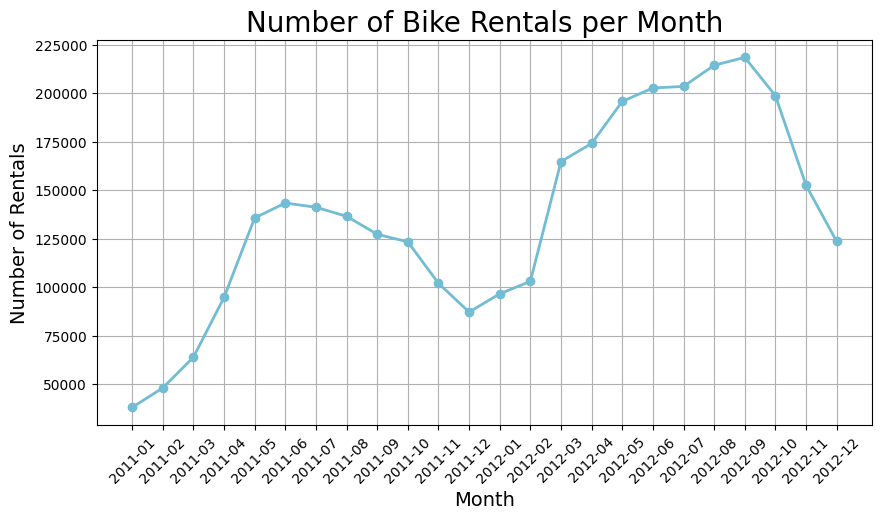

In [76]:
monthly_orders_df = hour_day_df.resample(rule='M', on='dteday').agg({
    "cnt_x": "sum"  # Jumlah pengguna sepeda per bulan
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt_x": "bike_rent",  # Ganti nama kolom
}, inplace=True)

# Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["bike_rent"], marker='o', linewidth=2, color="#72BCD4")
# Menambahkan judul dan label sumbu
plt.title("Number of Bike Rentals per Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Putar x-ticks untuk lebih mudah dibaca
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

### Pertanyaan 2: apakah ada pengaruh cuaca terhadap jumlah perental sepeda?

In [77]:
weather_rentals_df = hour_day_df.groupby("weathersit_x").agg({'cnt_x': 'sum'}).sort_values(by="cnt_x", ascending=False).reset_index()
weather_rentals_df.head()

,weathersit_x,cnt_x
0,1,2338173
1,2,795952
2,3,158331
3,4,223


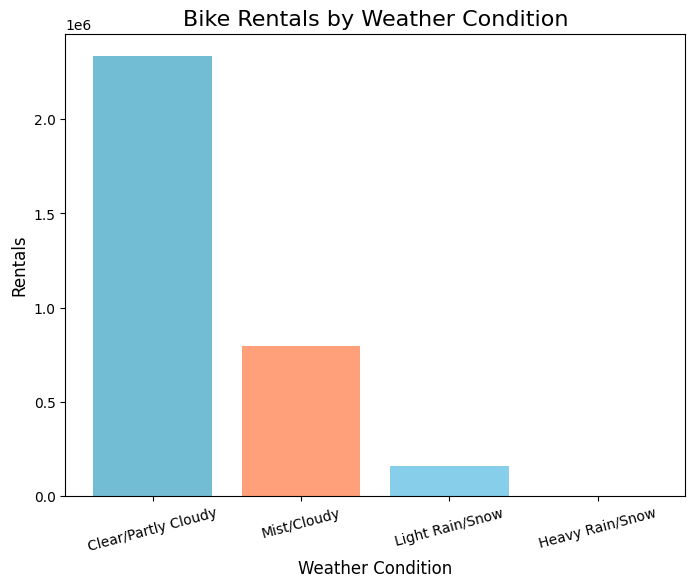

In [78]:
weather_rentals = hour_day_df.groupby('weathersit_x').agg({'cnt_x': 'sum'}).reset_index()

# Memberikan label pada kategori cuaca
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
weather_rentals['weathersit_x'] = weather_rentals['weathersit_x'].map(weather_labels)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(weather_rentals['weathersit_x'], weather_rentals['cnt_x'], color=['#72BCD4', '#FFA07A', '#87CEEB', '#FF6F61'])
plt.title("Bike Rentals by Weather Condition", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Rentals", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.show()

### Pertanyaan 3: apakah ada pengaruh musim terhadap rata-rata perental sepeda?

In [79]:
sum_bike_rent_df = hour_day_df.groupby("season_x").agg({'cnt_x': 'mean'}).sort_values(by="cnt_x", ascending=False).reset_index()
sum_bike_rent_df.head()

,season_x,cnt_x
0,3,236.016237
1,2,208.344069
2,4,198.868856
3,1,111.114569


C:\Users\fauza\AppData\Local\Temp\ipykernel_9188\4230391673.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


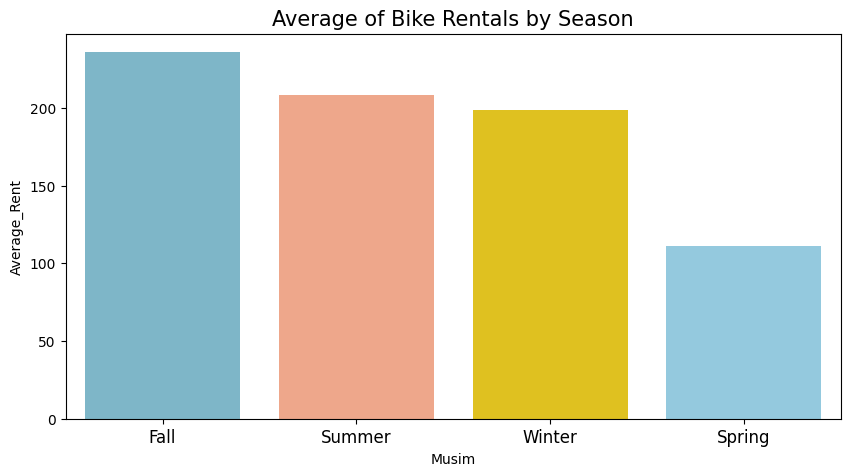

In [80]:
sum_bike_rent_df = hour_day_df.groupby(by="season_x").agg({'cnt_x': 'mean'}).reset_index()
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
sum_bike_rent_df["season_x"] = sum_bike_rent_df["season_x"].map(season_mapping)
sum_bike_rent_df.rename(columns={
    "cnt_x": "mean_Rent"
}, inplace=True)

plt.figure(figsize=(10,5))
colors = ["#72BCD4", "#FFA07A", "#FFD700", "#87CEEB"]

sns.barplot(
    x="season_x",
    y="mean_Rent",
    data=sum_bike_rent_df.sort_values(by="mean_Rent", ascending=False),
    palette=colors
)
plt.title("Average of Bike Rentals by Season", fontsize=15)
plt.ylabel("Average_Rent")
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- terjadi peningkatan dan sedikit penurunan dalam persewaan sepeda bulanan selama periode 2021-01 sampai 2012-12, hal ini bisa saja dipengauhi beberapa hal seperti cuaca, musim
- cuaca sangat berpengaruh dalam penyewaan sepeda,karena jika cuaca cerah, orang-orang dapat bermain diluar rumah, bisa dilihat dari data dan grafik yang ada, bahwa cuaca cerah sangat banyak orang yang menyewa sepeda
- dalam grafik yang ada, musim berpengaruh dalam persewaan sepeda ini 